# Let's analyse the TESS data of beta Pictoris

This jupyter notebook uses the $lightkurve$ package (https://docs.lightkurve.org/) to do this. If you want to learn how to use it, have a look at this GitHub repository, which has great tutorials: https://github.com/spacetelescope/tessworkshop_tutorials/tree/master/lightkurve

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import os

import lightkurve as lk

In [5]:
name = 'beta Pictoris'

## Let's have a look at the Target Pixel Files (TPF) of beta Pic through the four sectors (4-7) using the $lightkurve$ package 

SearchResult containing 4 data products.

target_name                     productFilename                        description     distance
----------- ------------------------------------------------------- ------------------ --------
  270577175 tess2018292075959-s0004-0000000270577175-0124-s_tp.fits Target pixel files      0.0
  270577175 tess2018319095959-s0005-0000000270577175-0125-s_tp.fits Target pixel files      0.0
  270577175 tess2018349182459-s0006-0000000270577175-0126-s_tp.fits Target pixel files      0.0
  270577175 tess2019006130736-s0007-0000000270577175-0131-s_tp.fits Target pixel files      0.0


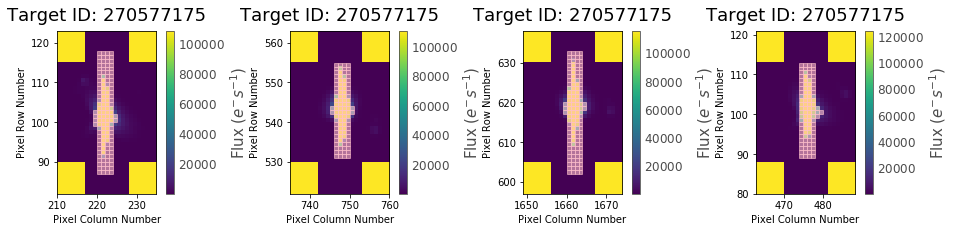

In [6]:
search_result = lk.search_targetpixelfile(name)
print(search_result)

tpfs = search_result.download_all()

fig, axs = plt.subplots(1, 4, figsize=(16, 3))
for idx, tpf in enumerate(tpfs):
    aper = tpf.pipeline_mask
    tpf.plot(aperture_mask=aper, ax=axs[idx])

## And now at the Light Curve of beta Pic through the four sectors

SearchResult containing 4 data products.

target_name                     productFilename                     description  distance
----------- ------------------------------------------------------- ------------ --------
  270577175 tess2018292075959-s0004-0000000270577175-0124-s_lc.fits Light curves      0.0
  270577175 tess2018319095959-s0005-0000000270577175-0125-s_lc.fits Light curves      0.0
  270577175 tess2018349182459-s0006-0000000270577175-0126-s_lc.fits Light curves      0.0
  270577175 tess2019006130736-s0007-0000000270577175-0131-s_lc.fits Light curves      0.0


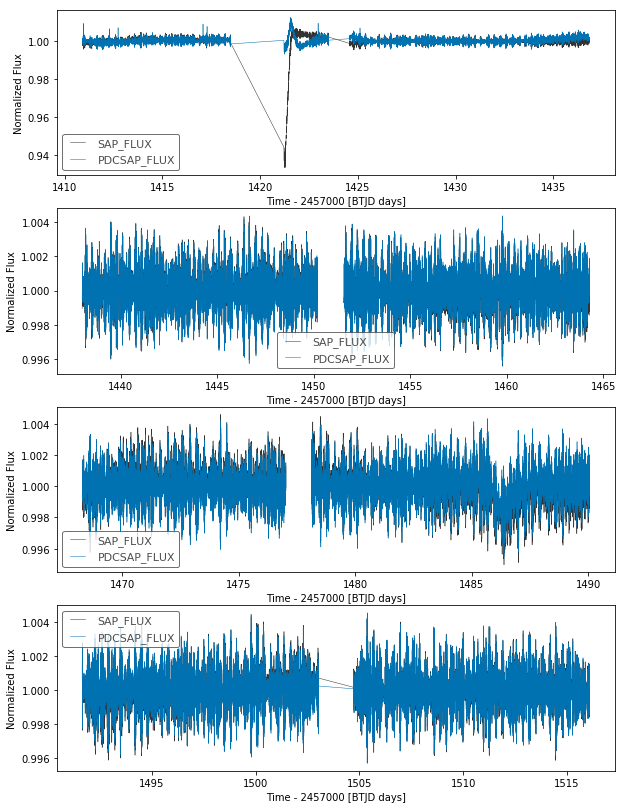

In [7]:
search_results = lk.search_lightcurvefile(name)
print(search_results)

lcs = search_results.download_all()
fig, axs = plt.subplots(4, 1, figsize=(10, 14))
for idx, tpf in enumerate(tpfs):
    lcs[idx].plot(ax=axs[idx]);

We see the instrumental anomaly in the first plot (Sector 4) betwen BTJD 1421 and BTJD 1424 - which was removed in the analysis. We also already see the dip in the third plot (Sector 6) which is identified as an exocomet in our paper. The two smaller dips in Sector 5 (second plot) are not visible yet, as the pulsations are too strong.  

## The following 4 fields show some basic informations on the observations of beta Pic in those four sectors - like the CCD which was used in order to observe the star.

In [36]:
tpfs[0].show_properties()

   Attribute                                                                            Description                                                                        
--------------- -----------------------------------------------------------------------------------------------------------------------------------------------------------
         camera                                                                                                                                                           4
            ccd                                                                                                                                                           1
         column                                                                                                                                                         210
            row                                                                                                                             

In [37]:
tpfs[1].show_properties()

   Attribute                                                                            Description                                                                        
--------------- -----------------------------------------------------------------------------------------------------------------------------------------------------------
         camera                                                                                                                                                           3
            ccd                                                                                                                                                           4
         column                                                                                                                                                         735
            row                                                                                                                             

In [38]:
tpfs[2].show_properties()

   Attribute                                                                            Description                                                                        
--------------- -----------------------------------------------------------------------------------------------------------------------------------------------------------
         camera                                                                                                                                                           3
            ccd                                                                                                                                                           3
         column                                                                                                                                                        1649
            row                                                                                                                             

In [39]:
tpfs[3].show_properties()

   Attribute                                                                            Description                                                                        
--------------- -----------------------------------------------------------------------------------------------------------------------------------------------------------
         camera                                                                                                                                                           3
            ccd                                                                                                                                                           3
         column                                                                                                                                                         463
            row                                                                                                                             

## A zoom in the PDCSAP light curve of the already mentioned anomaly in Sector 4

(1420, 1425)

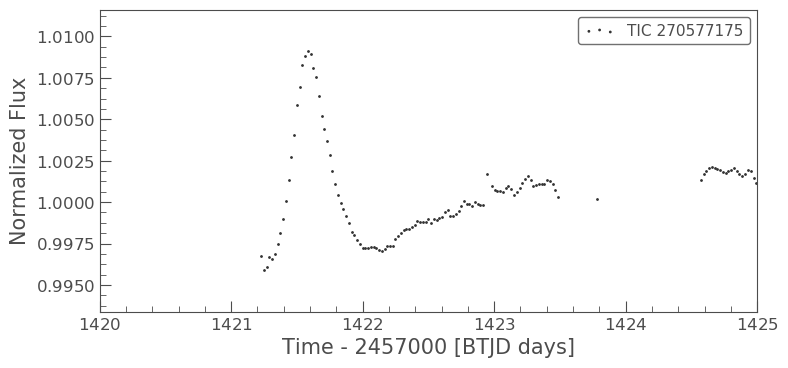

In [31]:
lc = lcs[0].PDCSAP_FLUX.bin(15).normalize()
for i in range(1,4):
    lc = lc.append(lcs[i].PDCSAP_FLUX.bin(15).normalize())
lc.scatter();  
#plt.ylim(0.995, 1.005)

plt.xlim(1420, 1425)

## A comparison between the SAP (lower plot) and the PDCSAP (upper plot) light curve (lc) of the 4 sectors binned to 30 minutes (= binning 15 two-minutes-observations). 

We see that the big dip is clearly visible in both light curves. We also see that in the PDCSAP lc the end of Sector 4 exhibits a brightening (at about BTJD 1435), which is not visible in the SAP lc. Thus, this is created by the reduction. The two smaller dips in Sector 5 are barely visible.

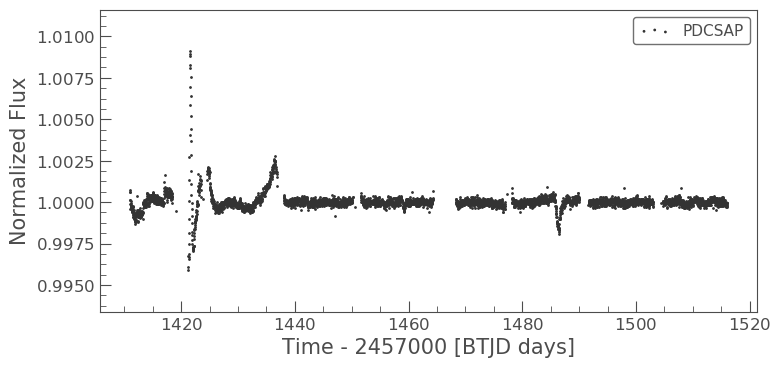

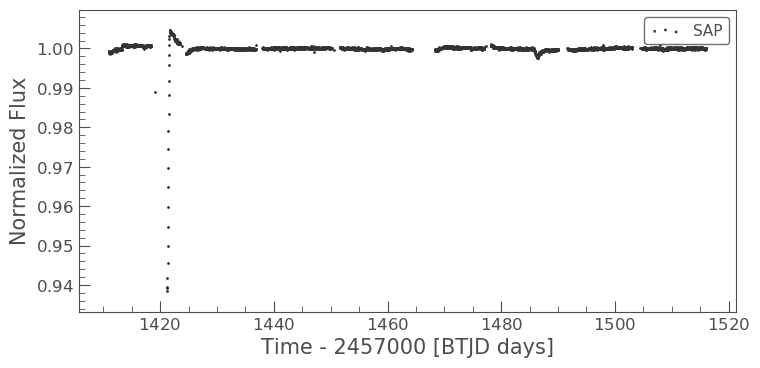

In [17]:
lc = lcs[0].PDCSAP_FLUX.bin(15).normalize()
for i in range(1,4):
    lc = lc.append(lcs[i].PDCSAP_FLUX.bin(15).normalize())
lc.scatter(label='PDCSAP');


lc = lcs[0].SAP_FLUX.bin(15).normalize()
for i in range(1,4):
    lc = lc.append(lcs[i].SAP_FLUX.bin(15).normalize())
lc.scatter(label='SAP'); 

## Let's have a look at the movement of beta Pic during the observations in each sector.

In [61]:
len(tpfs[0].time)

15803

In [64]:
len(lc0_PS.time)

15803

In [65]:
len(lc0_S.time)

15803

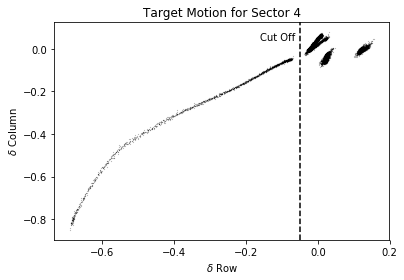

In [68]:
r, c = tpfs[0].estimate_centroids()
r -= np.nanmedian(r)
c -= np.nanmedian(c)
plt.scatter(r, c, s=0.01, c='k')
#plt.scatter(r[mask_centroid], c[mask_centroid], s=0.01, c='r')
plt.axvline(-0.05, c='k', ls='--')
#plt.axhline(-0.05, c='k', ls='--')
plt.xlabel('$\delta$ Row')
plt.ylabel('$\delta$ Column')
plt.title('Target Motion for Sector 4')
plt.text(-0.16, 0.04, 'Cut Off')
plt.show()

Left the dashed line is the delta position of beta Pic during the anomaly of Sector 4.

Let's store those outliers (left to the dashed line) as a mask.

In [69]:
c4=c
r4=r
mask0_centroid = r4 > -0.05

The other sectors:

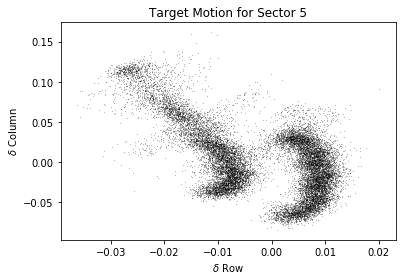

In [52]:
r, c = tpfs[1].estimate_centroids()
r -= np.nanmedian(r)
c -= np.nanmedian(c)
plt.scatter(r, c, s=0.01, c='k')
#plt.scatter(r[mask_centroid], c[mask_centroid], s=0.01, c='r')
#plt.axvline(-0.05, c='k', ls='--')
#plt.axhline(-0.05, c='k', ls='--')
plt.xlabel('$\delta$ Row')
plt.ylabel('$\delta$ Column')
plt.title('Target Motion for Sector 5')
#plt.text(-0.6, -0.02, 'Cut Off')
plt.show()

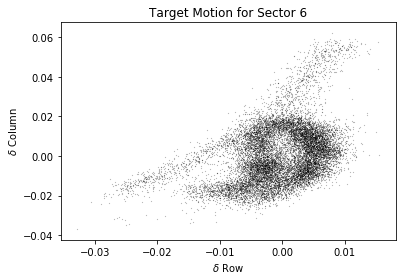

In [38]:
r, c = tpfs[2].estimate_centroids()
r -= np.nanmedian(r)
c -= np.nanmedian(c)
plt.scatter(r, c, s=0.01, c='k')
#plt.scatter(r[mask_centroid], c[mask_centroid], s=0.01, c='r')
#plt.axvline(-0.05, c='k', ls='--')
#plt.axhline(-0.05, c='k', ls='--')
plt.xlabel('$\delta$ Row')
plt.ylabel('$\delta$ Column')
plt.title('Target Motion for Sector 6')
#plt.text(-0.6, -0.02, 'Cut Off')
plt.show()

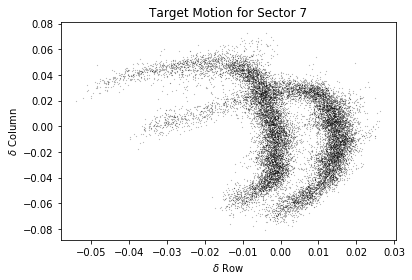

In [39]:
r, c = tpfs[3].estimate_centroids()
r -= np.nanmedian(r)
c -= np.nanmedian(c)
plt.scatter(r, c, s=0.01, c='k')
#plt.scatter(r[mask_centroid], c[mask_centroid], s=0.01, c='r')
#plt.axvline(-0.05, c='k', ls='--')
#plt.axhline(-0.05, c='k', ls='--')
plt.xlabel('$\delta$ Row')
plt.ylabel('$\delta$ Column')
plt.title('Target Motion for Sector 7')
#plt.text(-0.6, -0.02, 'Cut Off')
plt.show()

Let's make a mask for data with a non zero quality flag.

In [41]:
lc0_PS = lcs[0].PDCSAP_FLUX
lc1_PS = lcs[1].PDCSAP_FLUX
lc2_PS = lcs[2].PDCSAP_FLUX
lc3_PS = lcs[3].PDCSAP_FLUX

In [42]:
mask0_quality = lc0_PS.quality == 0
mask1_quality = lc1_PS.quality == 0
mask2_quality = lc2_PS.quality == 0
mask3_quality = lc3_PS.quality == 0

In [43]:
mask0 = mask0_quality & mask0_centroid #we also take the mask created above 
mask1 = mask1_quality
mask2 = mask2_quality
mask3 = mask3_quality

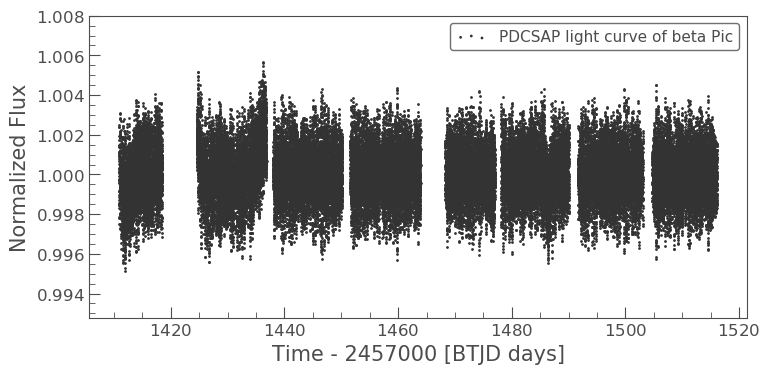

In [48]:
lc_PS = lc0_PS[mask0].normalize()
lc_PS = lc_PS.append(lc1_PS[mask1].normalize())
lc_PS = lc_PS.append(lc2_PS[mask2].normalize())
lc_PS = lc_PS.append(lc3_PS[mask3].normalize())

lc_PS.scatter(label = 'PDCSAP light curve of beta Pic');

# The same but with SAP_FLUX

In [56]:
lc0_S = lcs[0].SAP_FLUX
lc1_S = lcs[1].SAP_FLUX
lc2_S = lcs[2].SAP_FLUX
lc3_S = lcs[3].SAP_FLUX

In [57]:
mask0_quality = lc0_S.quality == 0
mask1_quality = lc1_S.quality == 0
mask2_quality = lc2_S.quality == 0
mask3_quality = lc3_S.quality == 0

In [58]:
mask0_centroid = r4 > -0.05

In [66]:
len(mask0_quality)

15803

In [70]:
len(mask0_centroid)

15803

In [71]:
mask0 = mask0_quality & mask0_centroid 
mask1 = mask1_quality
mask2 = mask2_quality
mask3 = mask3_quality

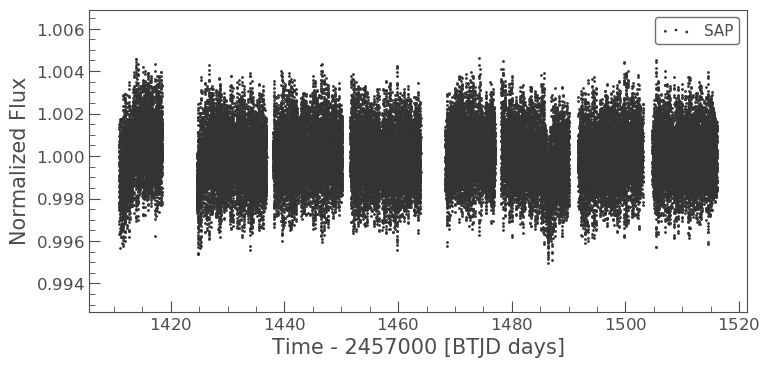

In [73]:
lc_S = lc0_S[mask0].normalize()
lc_S = lc_S.append(lc1_S[mask1].normalize())
lc_S = lc_S.append(lc2_S[mask2].normalize())
lc_S = lc_S.append(lc3_S[mask3].normalize())

lc_S.scatter(label= 'SAP');  

Again the PDCSAP and SAP light curve for all 4 sectors but without the anomaly in Sector 4 (at about BTJD 1420).

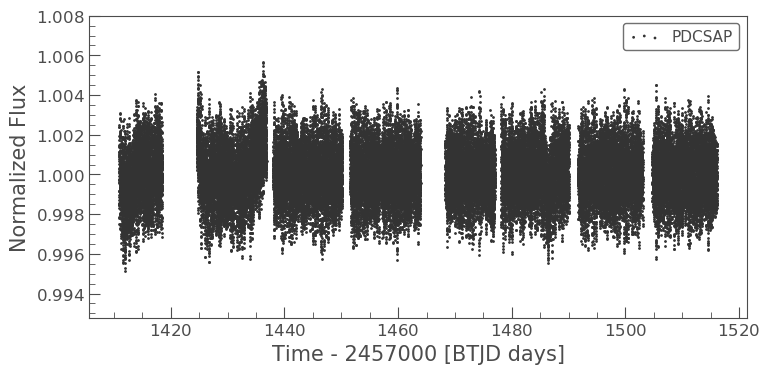

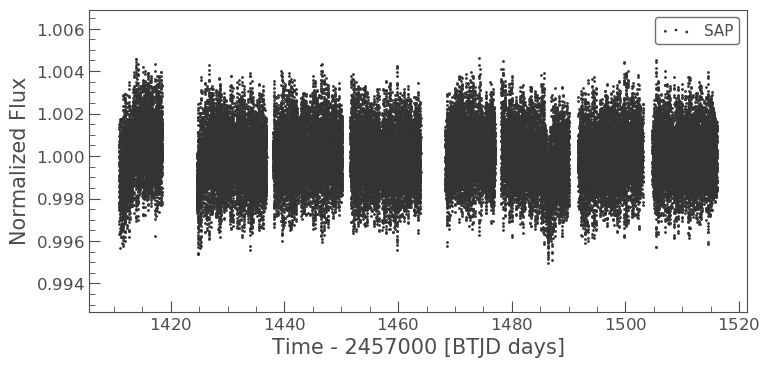

In [74]:
lc_PS.scatter(label= 'PDCSAP');
lc_S.scatter(label= 'SAP');  

# The light curves of beta Pic binned to 30 mins but w/o the anomaly in Sec 4.

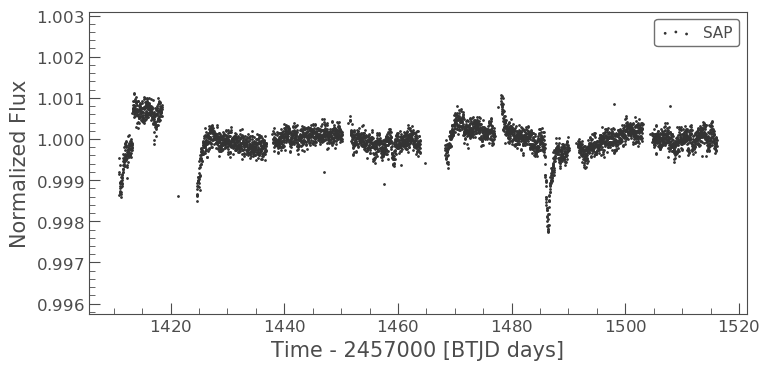

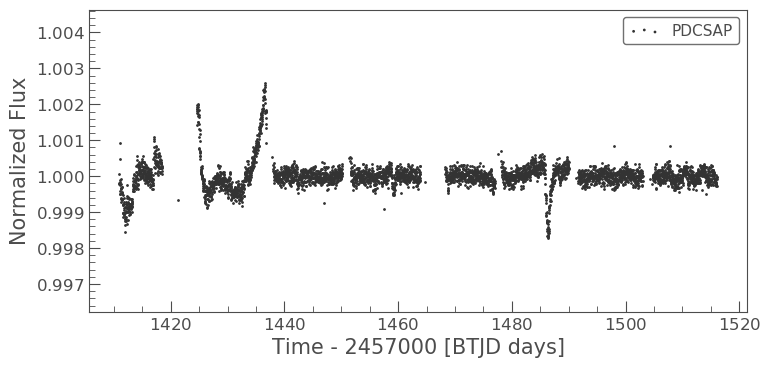

In [21]:
lc_S.bin(15).scatter(label= 'SAP'); 
lc_PS.bin(15).scatter(label= 'PDCSAP'); 

Convert the Normalized Flux into Instrumental Magnitudes and export the data:

In [180]:
datapairs=np.stack((lc_PS.time, -2.5*np.log10(lc_PS.flux)), axis=-1)
np.savetxt('betaPic4567_mag.txt',datapairs)